In [74]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from global_land_mask import globe
import matplotlib as mpl
import metpy.calc as mpcalc
from metpy.units import units
import scipy
import metpy
mpl.rcParams['figure.dpi']= 300

In [75]:
g = 9.80616 #Avg. gravity acceleration on Earth
Cp = 1004.64 #Specific heat at constant pressure for dry air
Lv = 2.501e6 #Latent heat of vaporization for liquid water at 0C

In [76]:
import warnings;
warnings.filterwarnings('ignore');

In [77]:
e = '/media/rakshith/Seagate Expansion Drive/mraks/ERA TGMS all variables BoB.nc'
ds5 = xr.open_dataset(e)
jjas = ds5.time.dt.month.isin(range(6, 10)) #JJAS
#jjas = ds5.time.dt.month.isin(6)
clim = ds5.sel(time=jjas)
ds5 = clim.groupby('time.year').mean('time')

In [78]:
spbob = '/media/rakshith/Seagate Expansion Drive/mraks/ERA surface pressure BoB.nc'
ds12 = xr.open_dataset(spbob)
jjas = ds12.time.dt.month.isin(range(6, 10)) #JJAS
#jjas = ds12.time.dt.month.isin(6)
clim = ds12.sel(time=jjas)
ds13 = clim.sp.groupby('time.year').mean('time')/100

In [79]:
#For Bob
x=ds5.level
xs= np.arange(1, 1001, 1)
wadvbob=[]
hadvbob=[]
for j in ds5.year:
    ds6 = ds5.sel(year=j)
    ps2 = ds13.sel(year=j)
    m = Cp*ds6.t + Lv*ds6.q + ds6.z
    wadv = mpcalc.advection(m, w=ds6.w)
    inter = wadv.interp(level=xs, method="cubic")
    selected = inter.where(inter.level < ps2)
    grid = selected.fillna(0)
    integral = grid.integrate('level')/g
    wadvbob.append(-1*integral.mean(dim=['latitude', 'longitude']))
    hadv = mpcalc.advection(m, u=ds6.u, v=ds6.v)
    inter = hadv.interp(level=xs, method="cubic")
    selected = inter.where(inter.level < ps2)
    grid = selected.fillna(0)
    integral = grid.integrate('level')/g
    hadvbob.append(-100*integral.mean(dim=['latitude', 'longitude']))

# Qdiv from mass consistent dataset

In [80]:
en = '/media/rakshith/Seagate Expansion Drive/mraks/Mass consistent data/BoB Total energy + Tendency/*.nc'
ds = xr.open_mfdataset(en)

In [81]:
spat = ds.mean(dim=['latitude', 'longitude'])
timav = spat.groupby('time.year').mean('time')

In [82]:
Qdiv = timav.tediv #+ timav.tetend

# Qdiv from fluxes

In [83]:
b = '/media/rakshith/Seagate Expansion Drive/mraks/ERA5 Qdiv BoB.nc'
dsb = xr.open_dataset(b)

In [84]:
bspat = dsb.mean(dim=['latitude', 'longitude'])
btimav = bspat.groupby('time.year').mean('time')

In [85]:
acQdiv = btimav.mtnswrf + btimav.mtnlwrf - btimav.msnlwrf - btimav.msnswrf - btimav.mslhf - btimav.msshf

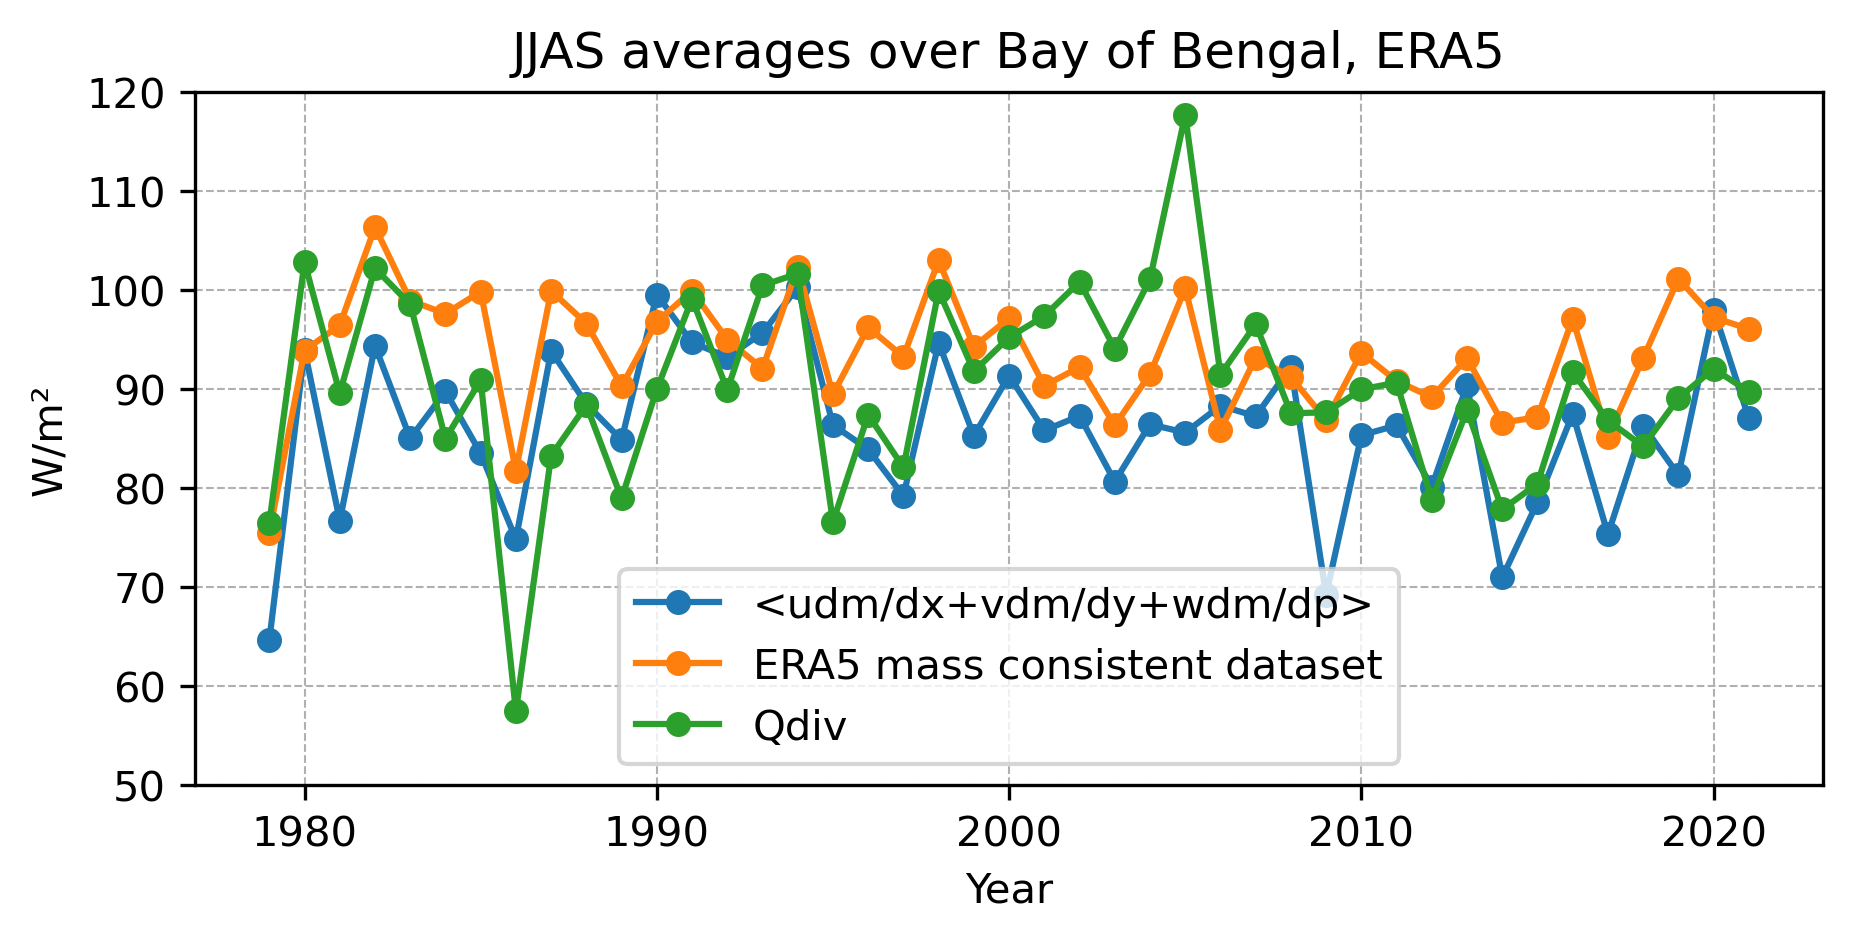

In [86]:
plt.rcParams['figure.figsize'] = [7,3]

plt.plot(Qdiv.year, np.add(wadvbob,hadvbob)[20:], label='<udm/dx+vdm/dy+wdm/dp>', marker='o', markersize=5)
plt.plot(Qdiv.year, Qdiv, label='ERA5 mass consistent dataset', marker='o', markersize=5)
plt.plot(Qdiv.year, acQdiv, label='Qdiv', marker='o', markersize=5)
plt.xlabel('Year')
plt.ylabel('W/m\u00b2')
plt.ylim(50,120)
plt.legend()
plt.title('JJAS averages over Bay of Bengal, ERA5')
plt.grid(linestyle='--', linewidth=0.5)

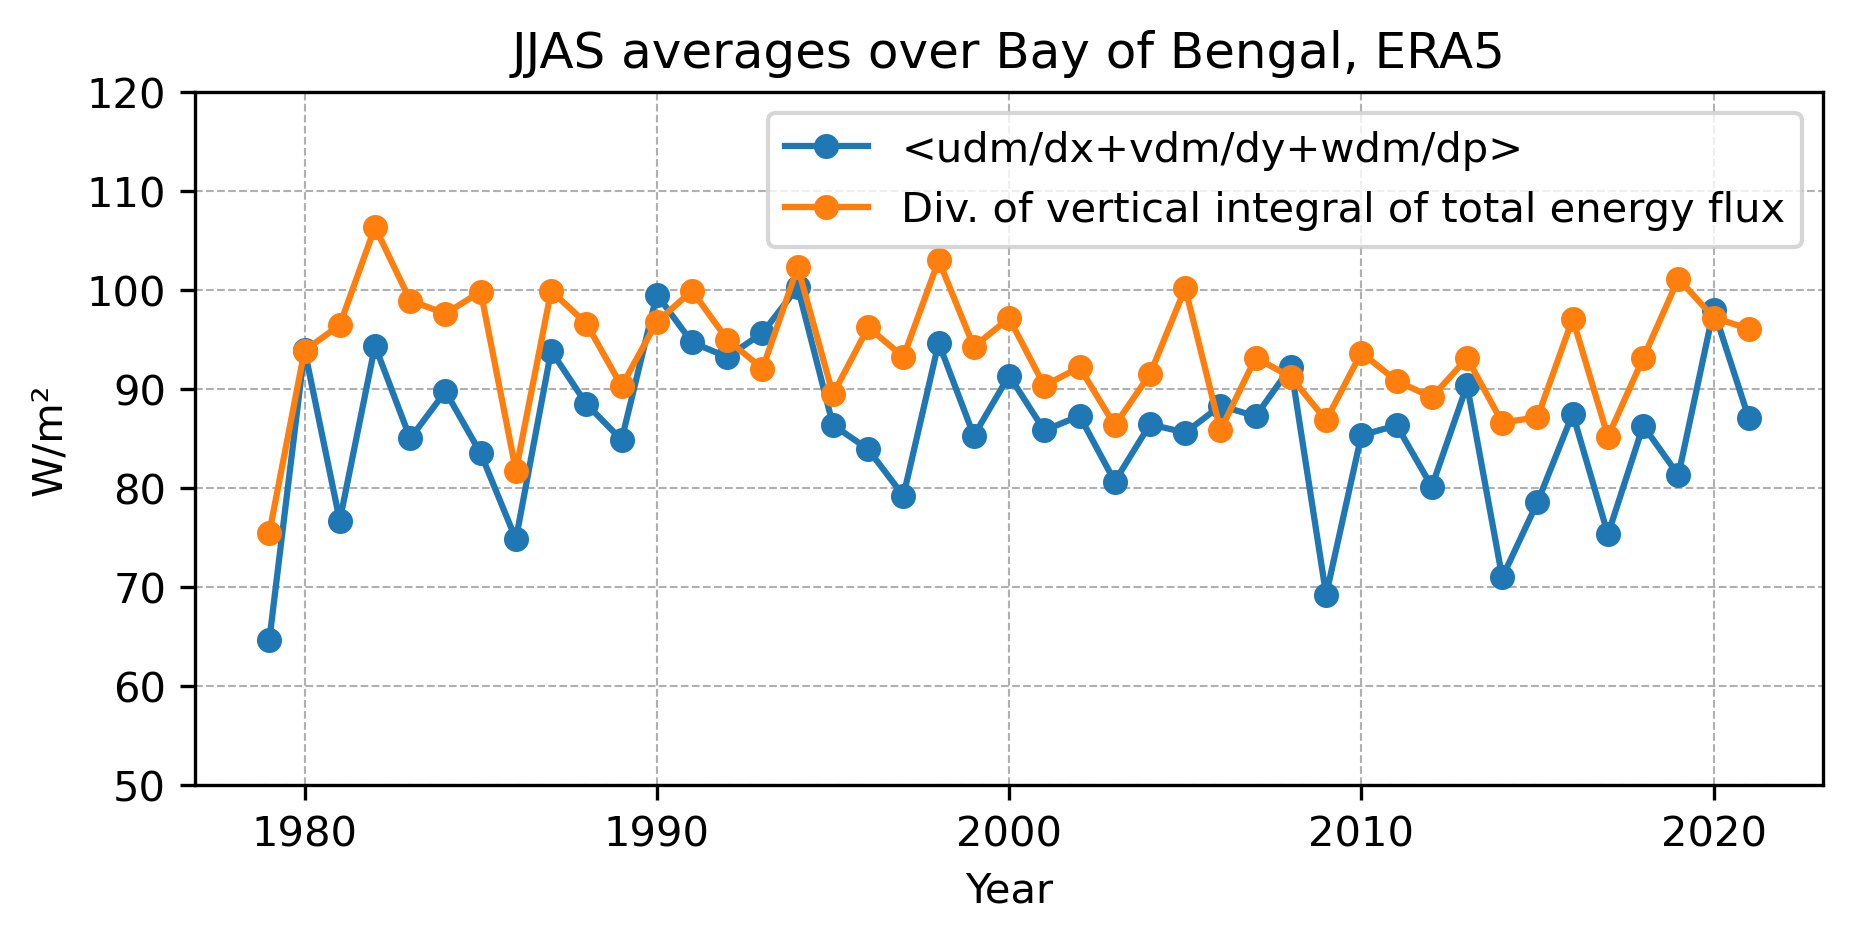

In [89]:
plt.plot(Qdiv.year, np.add(wadvbob,hadvbob)[20:], label='<udm/dx+vdm/dy+wdm/dp>', marker='o', markersize=5)
plt.plot(Qdiv.year, Qdiv, label='Div. of vertical integral of total energy flux', marker='o', markersize=5)
plt.xlabel('Year')
plt.ylabel('W/m\u00b2')
plt.ylim(50,120)
plt.legend()
plt.title('JJAS averages over Bay of Bengal, ERA5')
plt.grid(linestyle='--', linewidth=0.5)

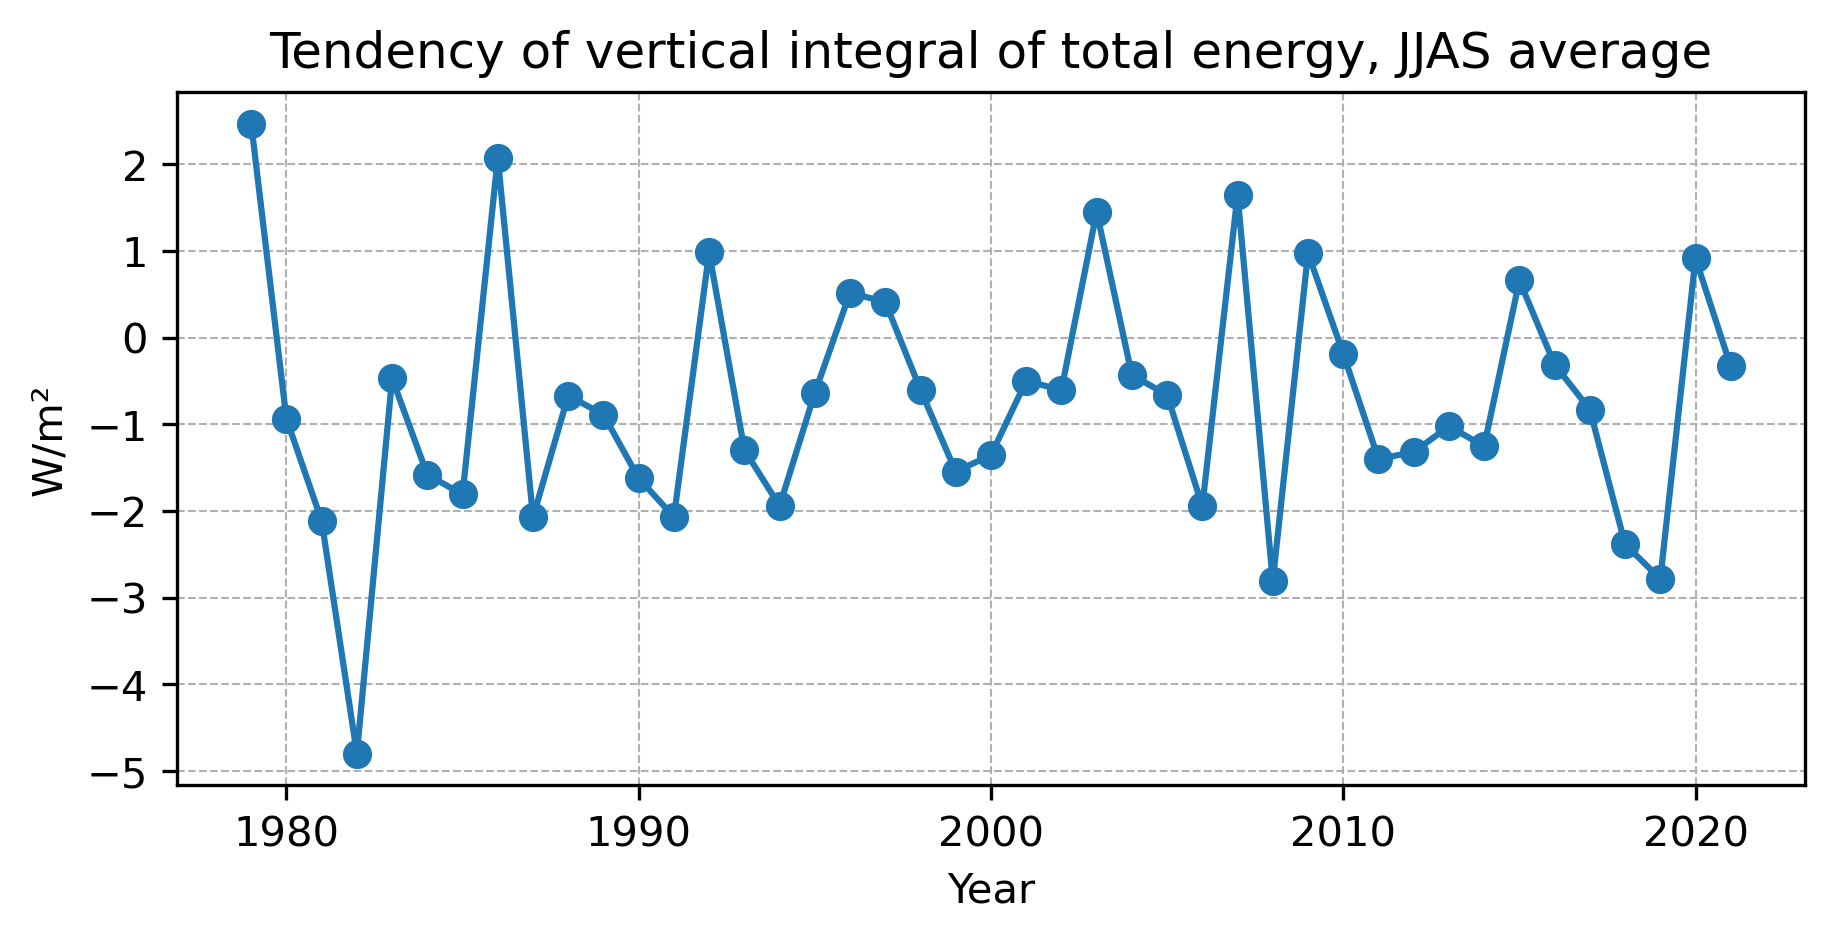

In [60]:
timav.tetend.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('W/m\u00b2')
plt.title('Tendency of vertical integral of total energy, JJAS average')
plt.grid(linestyle='--', linewidth=0.5)

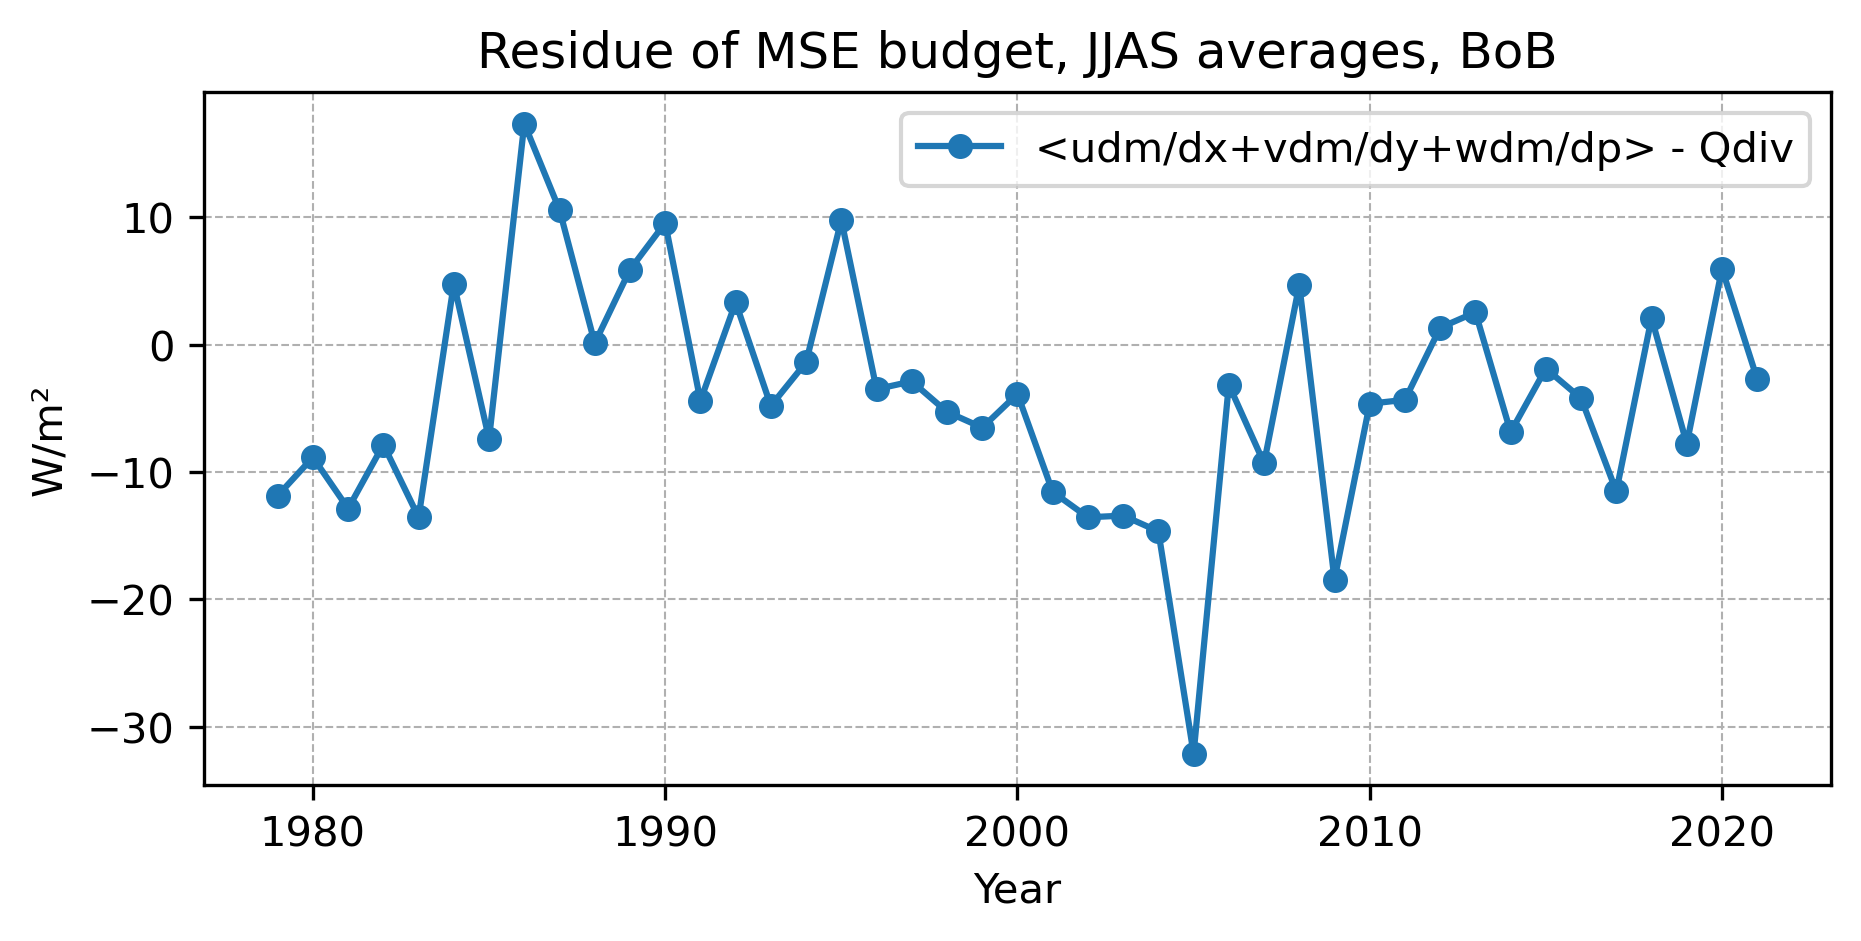

In [61]:
plt.plot(Qdiv.year, np.add(wadvbob,hadvbob)[20:]- acQdiv, label='<udm/dx+vdm/dy+wdm/dp> - Qdiv', marker='o', markersize=5)
#plt.plot(Qdiv.year, , label='Qdiv', marker='o', markersize=5)
plt.xlabel('Year')
plt.ylabel('W/m\u00b2')
plt.legend()
plt.title('Residue of MSE budget, JJAS averages, BoB')
plt.grid(linestyle='--', linewidth=0.5)

In [17]:
June = spat.time.dt.month.isin(range(6, 7))
July = spat.time.dt.month.isin(range(7, 8))
August = spat.time.dt.month.isin(range(8, 9))
September = spat.time.dt.month.isin(range(9, 10))

In [19]:
X = np.arange(1979, 2022, 1)

Text(0.5, 1.0, 'Tendency of vertical integral of total energy')

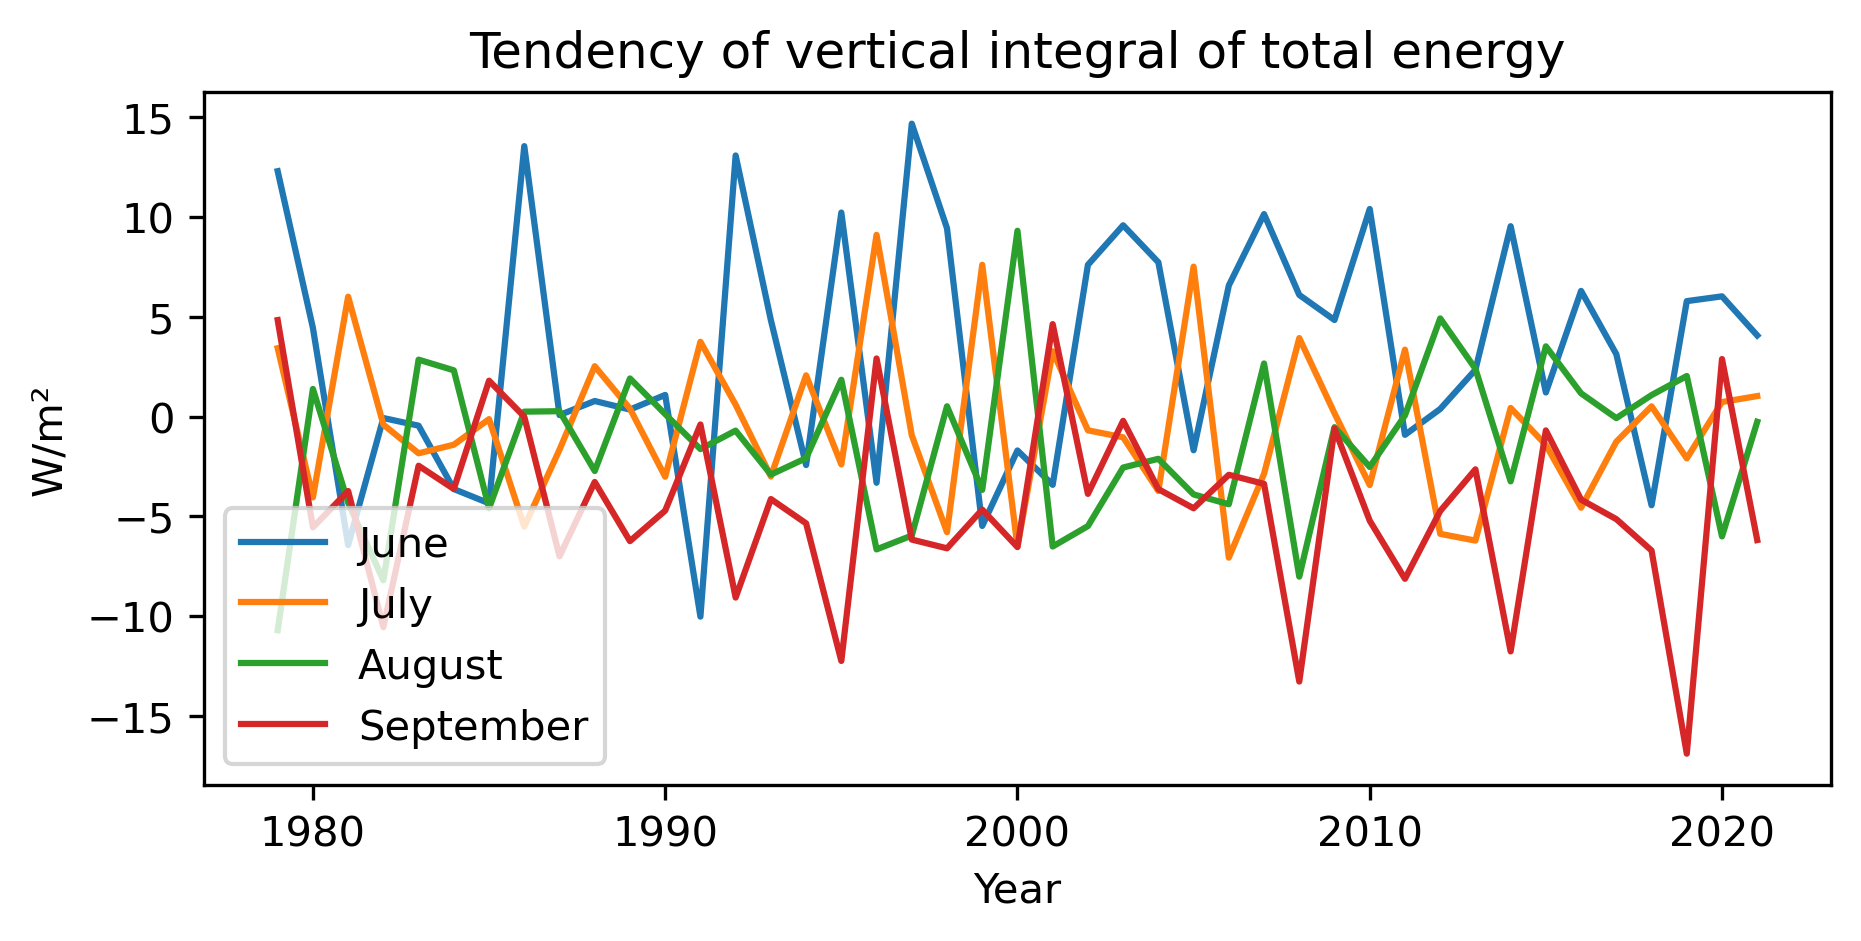

In [24]:
plt.plot(X, spat.tetend.sel(time=June), label='June')
plt.plot(X, spat.tetend.sel(time=July), label='July')
plt.plot(X, spat.tetend.sel(time=August), label='August')
plt.plot(X, spat.tetend.sel(time=September), label='September')
plt.xlabel('Year')
plt.ylabel('W/m\u00b2')
plt.legend()
plt.title('Tendency of vertical integral of total energy')

In [52]:
X1 = np.arange(1959, 2022, 1)

In [48]:
x=ds5.level
xs= np.arange(1, 1001, 1)
cont=[]
for j in ds5.year:
    ds6 = ds5.sel(year=j)
    ps2 = ds13.sel(year=j)
    hadv = mpcalc.advection(m*0+1, u=ds6.u, v=ds6.v)
    inter = hadv.interp(level=xs, method="cubic")
    selected = inter.where(inter.level < ps2)
    grid = selected.fillna(0)
    integral = grid.integrate('level')/g
    cont.append(integral.mean(dim=['latitude', 'longitude']))
    
    adv1 = mpcalc.advection(m*0+1, u=ds6.u)
    inter = adv1.interp(level=xs, method="cubic")
    selected = inter.where(inter.level < ps2)
    grid = selected.fillna(0)
    integral = grid.integrate('level')/g
    cont.append(-100*integral.mean(dim=['latitude', 'longitude']))
    
    adv2 = mpcalc.advection(m*0+1, u=ds6.v)
    inter = adv2.interp(level=xs, method="cubic")
    selected = inter.where(inter.level < ps2)
    grid = selected.fillna(0)
    integral = grid.integrate('level')/g
    cont.append(-100*integral.mean(dim=['latitude', 'longitude']))

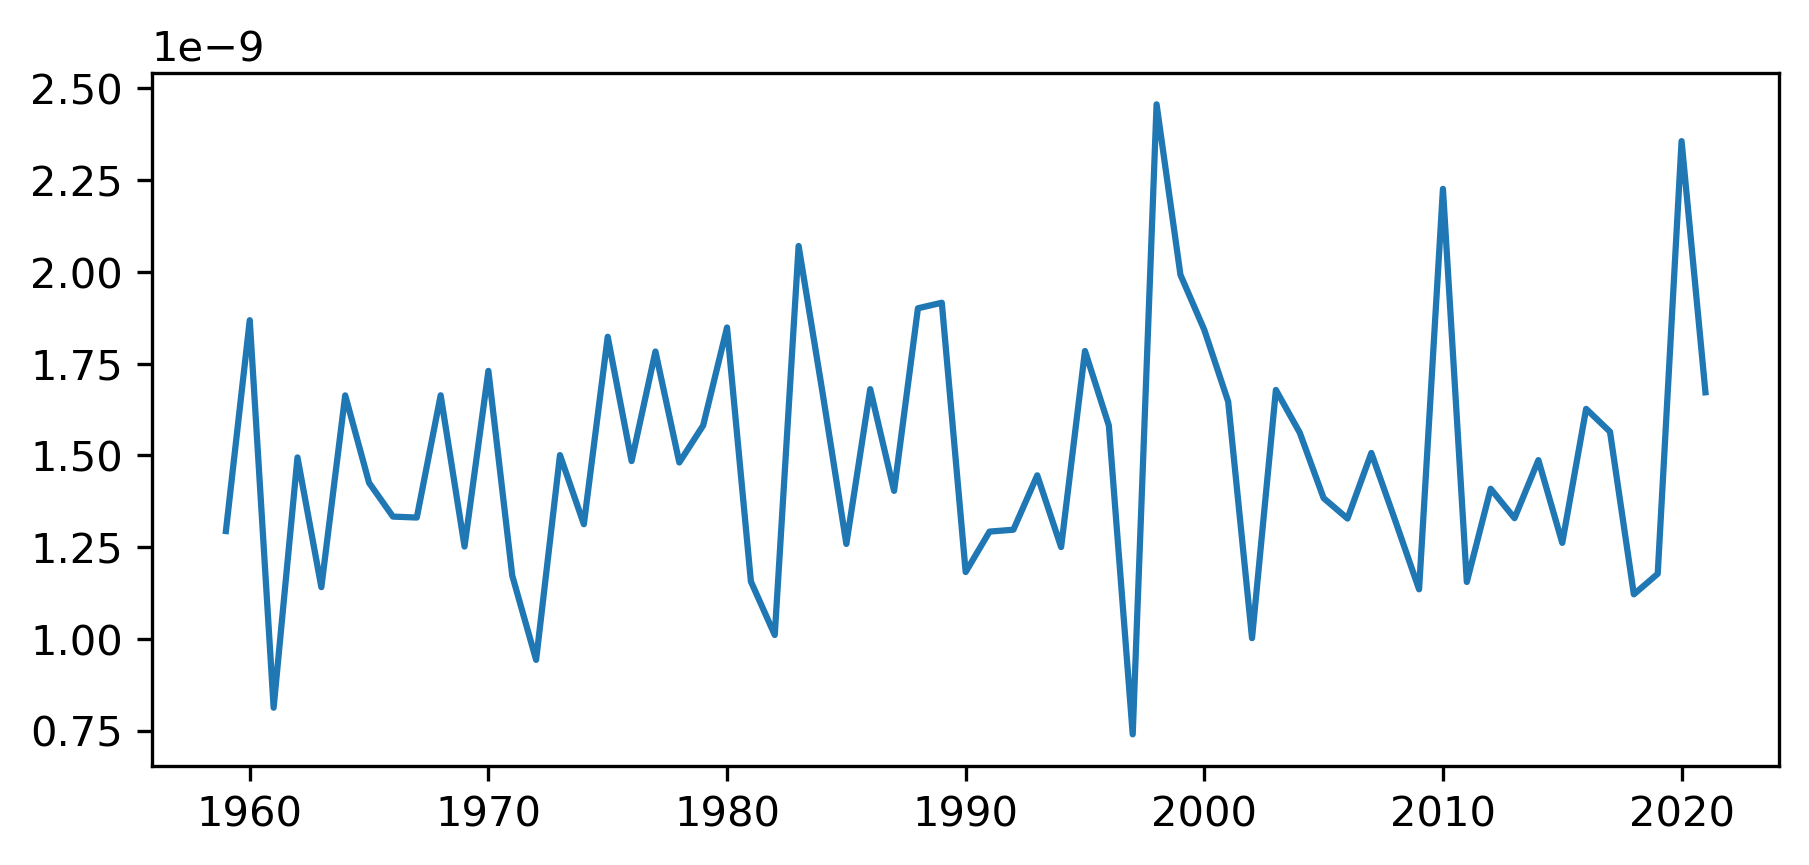

In [53]:
plt.plot(X1, cont)

# India

# Qdiv from fluxes

In [90]:
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
dsb = xr.open_dataset(h)

In [91]:
jjas = dsb.time.dt.month.isin(range(6, 10)) #JJAS
clim = dsb.sel(time=jjas)

In [92]:
lon_grid, lat_grid = np.meshgrid(dsb.longitude, dsb.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [93]:
bspat = clim.where(mask>0).mean(dim=['latitude', 'longitude'])
btimav = bspat.groupby('time.year').mean('time')

acQdiv = btimav.mtnswrf + btimav.mtnlwrf - btimav.msnlwrf - btimav.msnswrf - btimav.mslhf - btimav.msshf

# Qdiv from mass consistent dataset

In [94]:
en = '/media/rakshith/Seagate Expansion Drive/mraks/Mass consistent data/India Total energy + Tendency/*.nc'
ds = xr.open_mfdataset(en)

In [95]:
spat = ds.where(mask>0).mean(dim=['latitude', 'longitude'])
timav = spat.groupby('time.year').mean('time')

In [96]:
Qdiv = timav.tediv + timav.tetend

# Qdiv using integration

In [97]:
d = '/media/rakshith/Seagate Expansion Drive/mraks/ERA TGMS all variables India.nc'
ds7 = xr.open_dataset(d)
jjas = ds7.time.dt.month.isin(range(6, 10)) #JJAS
#jjas = ds7.time.dt.month.isin(6)
clim = ds7.sel(time=jjas)
ds7 = clim.groupby('time.year').mean('time')

lon_grid1, lat_grid1 = np.meshgrid(ds7.longitude, ds7.latitude)
mask1 = globe.is_land(lat_grid1, lon_grid1)

In [98]:
spind = '/media/rakshith/Seagate Expansion Drive/mraks/ERA surface pressure India.nc'
ds10 = xr.open_dataset(spind)
jjas = ds10.time.dt.month.isin(range(6, 10)) #JJAS
#jjas = ds10.time.dt.month.isin(6)
clim = ds10.sel(time=jjas)
ds11 = clim.sp.groupby('time.year').mean('time')/100

In [99]:
#MSE advection terms
x=ds7.level
xs= np.arange(1, 1001, 1)
hadvind=[] #horizontal advection
wadvind=[] #vertical advection
uadvind=[]
for j in ds7.year:
    ds8 = ds7.sel(year=j)
    ps1 = ds11.sel(year=j)
    m = Cp*ds8.t + Lv*ds8.q + ds8.z
    wadv = mpcalc.advection(m, w=ds8.w)
    inter = wadv.interp(level=xs, method="cubic")
    selected = inter.where(inter.level < ps1)
    grid = selected.fillna(0)
    integral = grid.integrate('level')/g
    wadvind.append(-1*integral.where(mask1>0).mean(dim=['latitude', 'longitude']))
    hadv = mpcalc.advection(m, u=ds8.u, v=ds8.v)
    inter = hadv.interp(level=xs, method="cubic")
    selected = inter.where(inter.level < ps1)
    grid = selected.fillna(0)
    integral = grid.integrate('level')/g
    hadvind.append(-100*integral.where(mask1>0).mean(dim=['latitude', 'longitude']))

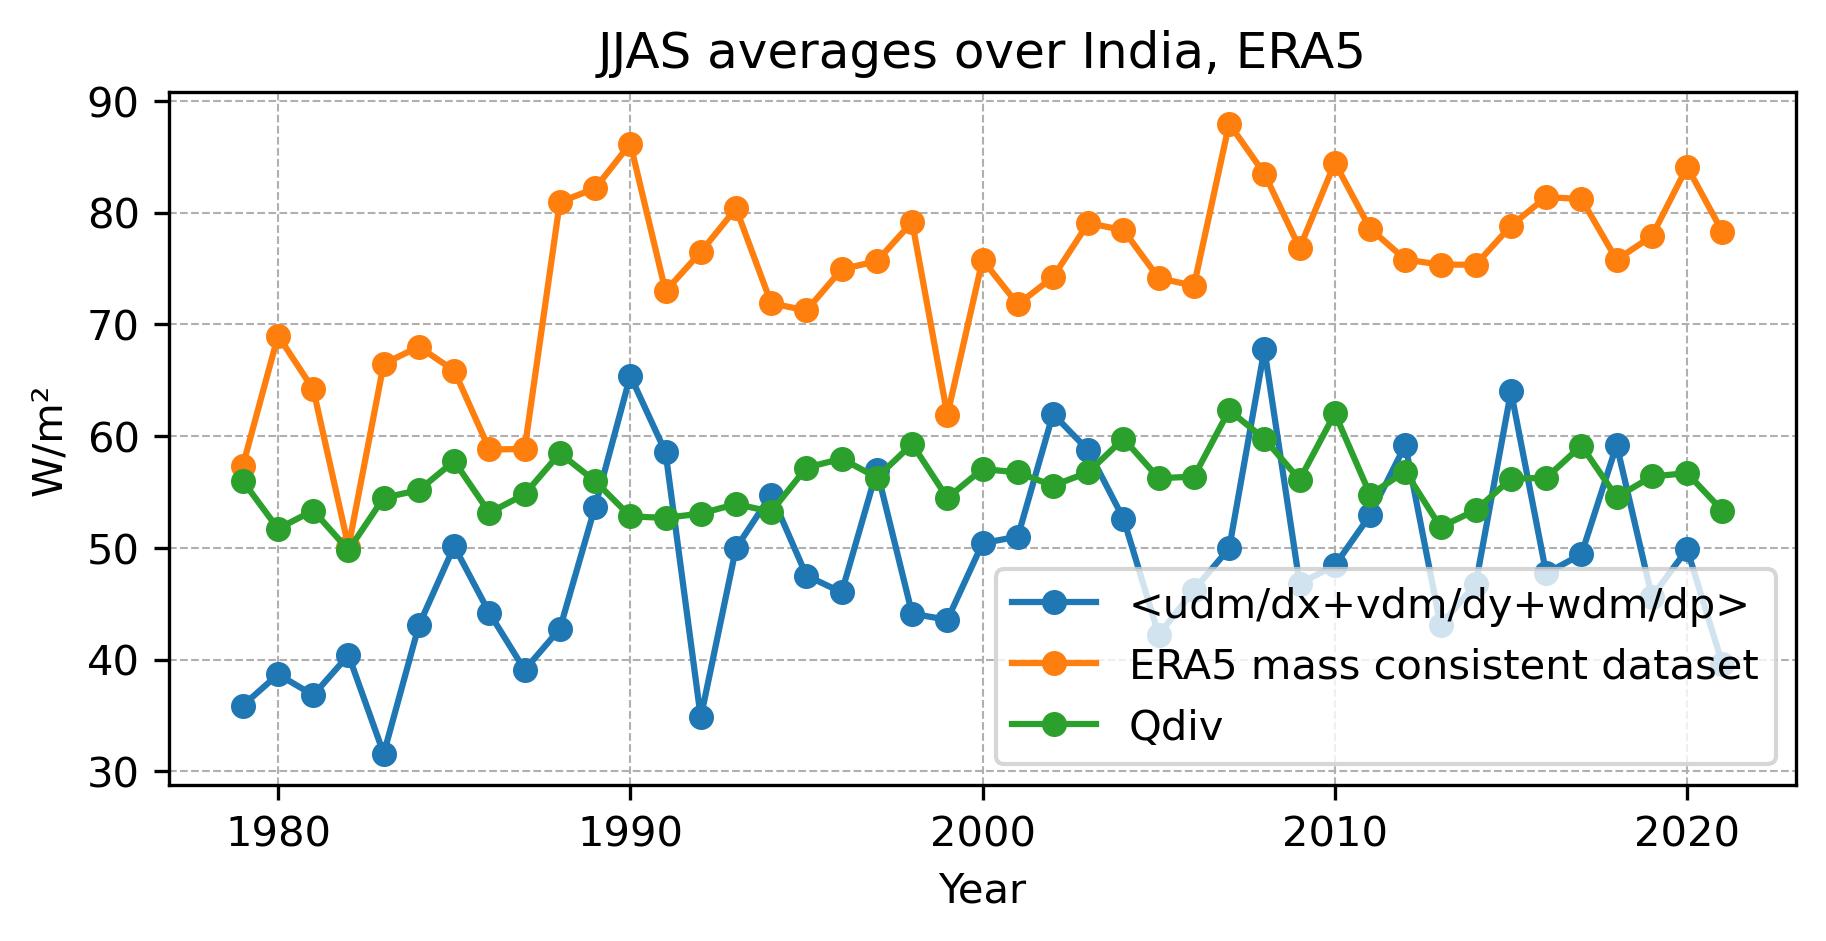

In [72]:
plt.rcParams['figure.figsize'] = [7,3]

plt.plot(Qdiv.year, np.add(wadvind,hadvind)[20:], label='<udm/dx+vdm/dy+wdm/dp>', marker='o', markersize=5)
plt.plot(Qdiv.year, Qdiv, label='ERA5 mass consistent dataset', marker='o', markersize=5)
plt.plot(Qdiv.year, acQdiv[20:], label='Qdiv', marker='o', markersize=5)
plt.xlabel('Year')
plt.ylabel('W/m\u00b2')
#plt.ylim(50,120)
plt.legend()
plt.title('JJAS averages over India, ERA5')
plt.grid(linestyle='--', linewidth=0.5)

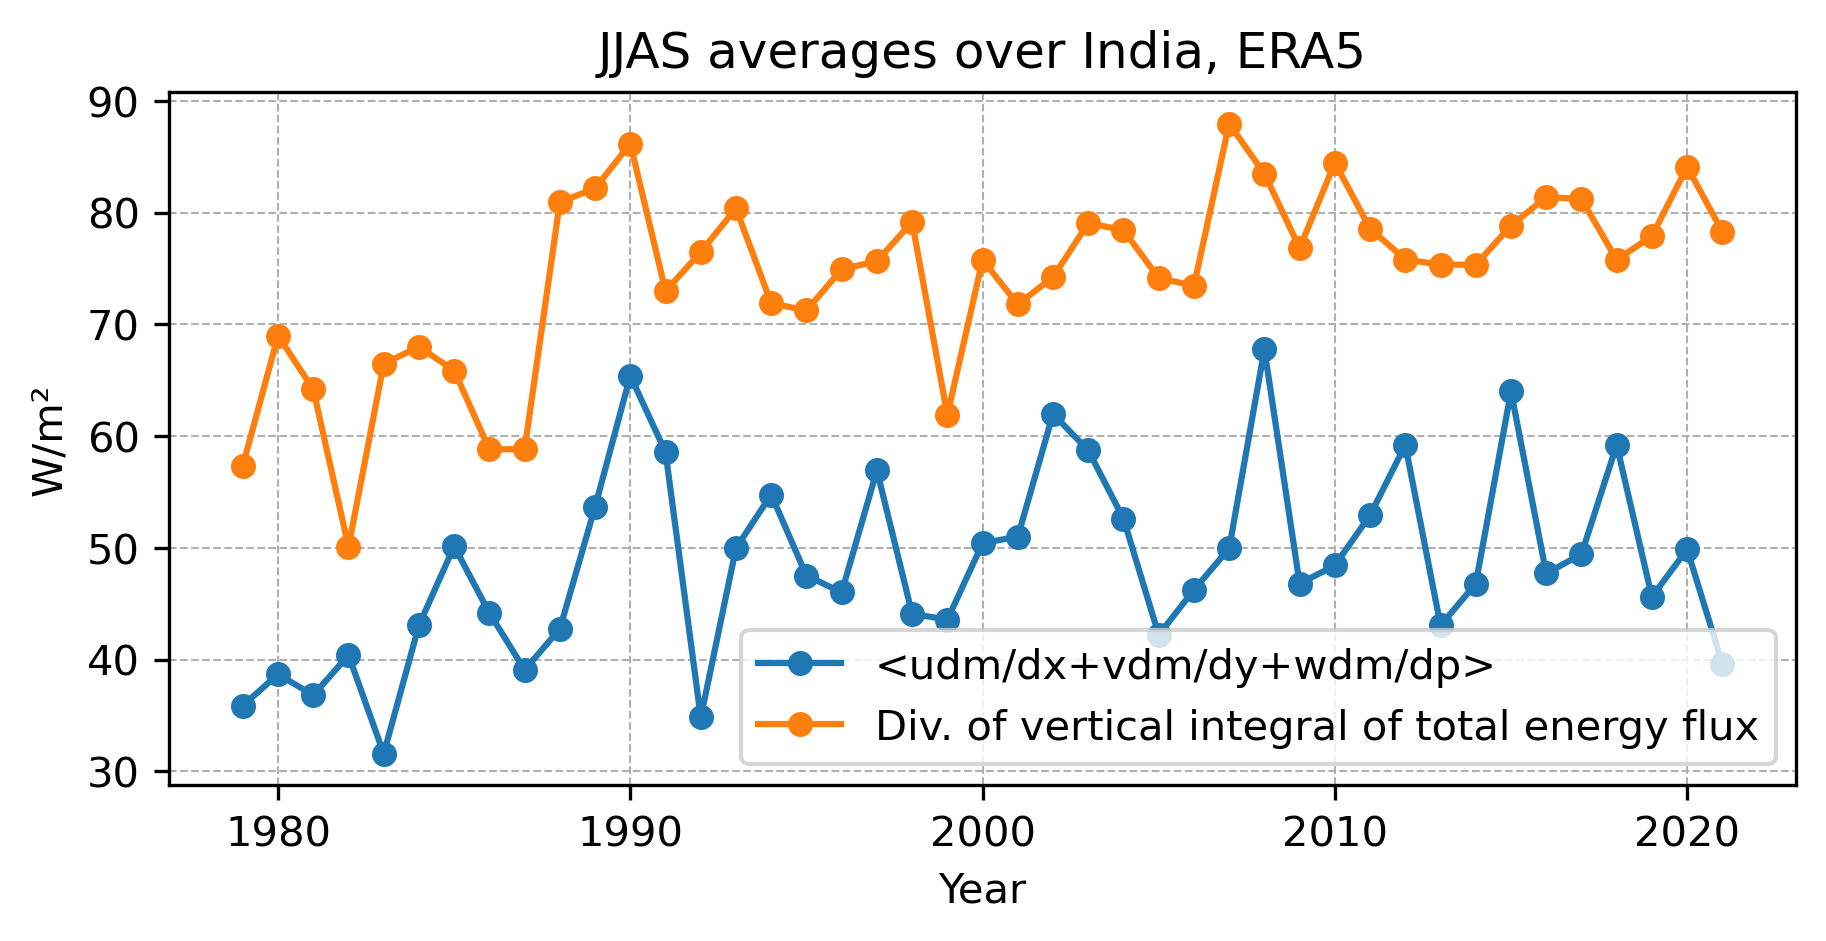

In [100]:
plt.plot(Qdiv.year, np.add(wadvind,hadvind)[20:], label='<udm/dx+vdm/dy+wdm/dp>', marker='o', markersize=5)
plt.plot(Qdiv.year, Qdiv, label='Div. of vertical integral of total energy flux', marker='o', markersize=5)
plt.xlabel('Year')
plt.ylabel('W/m\u00b2')
plt.legend()
plt.title('JJAS averages over India, ERA5')
plt.grid(linestyle='--', linewidth=0.5)

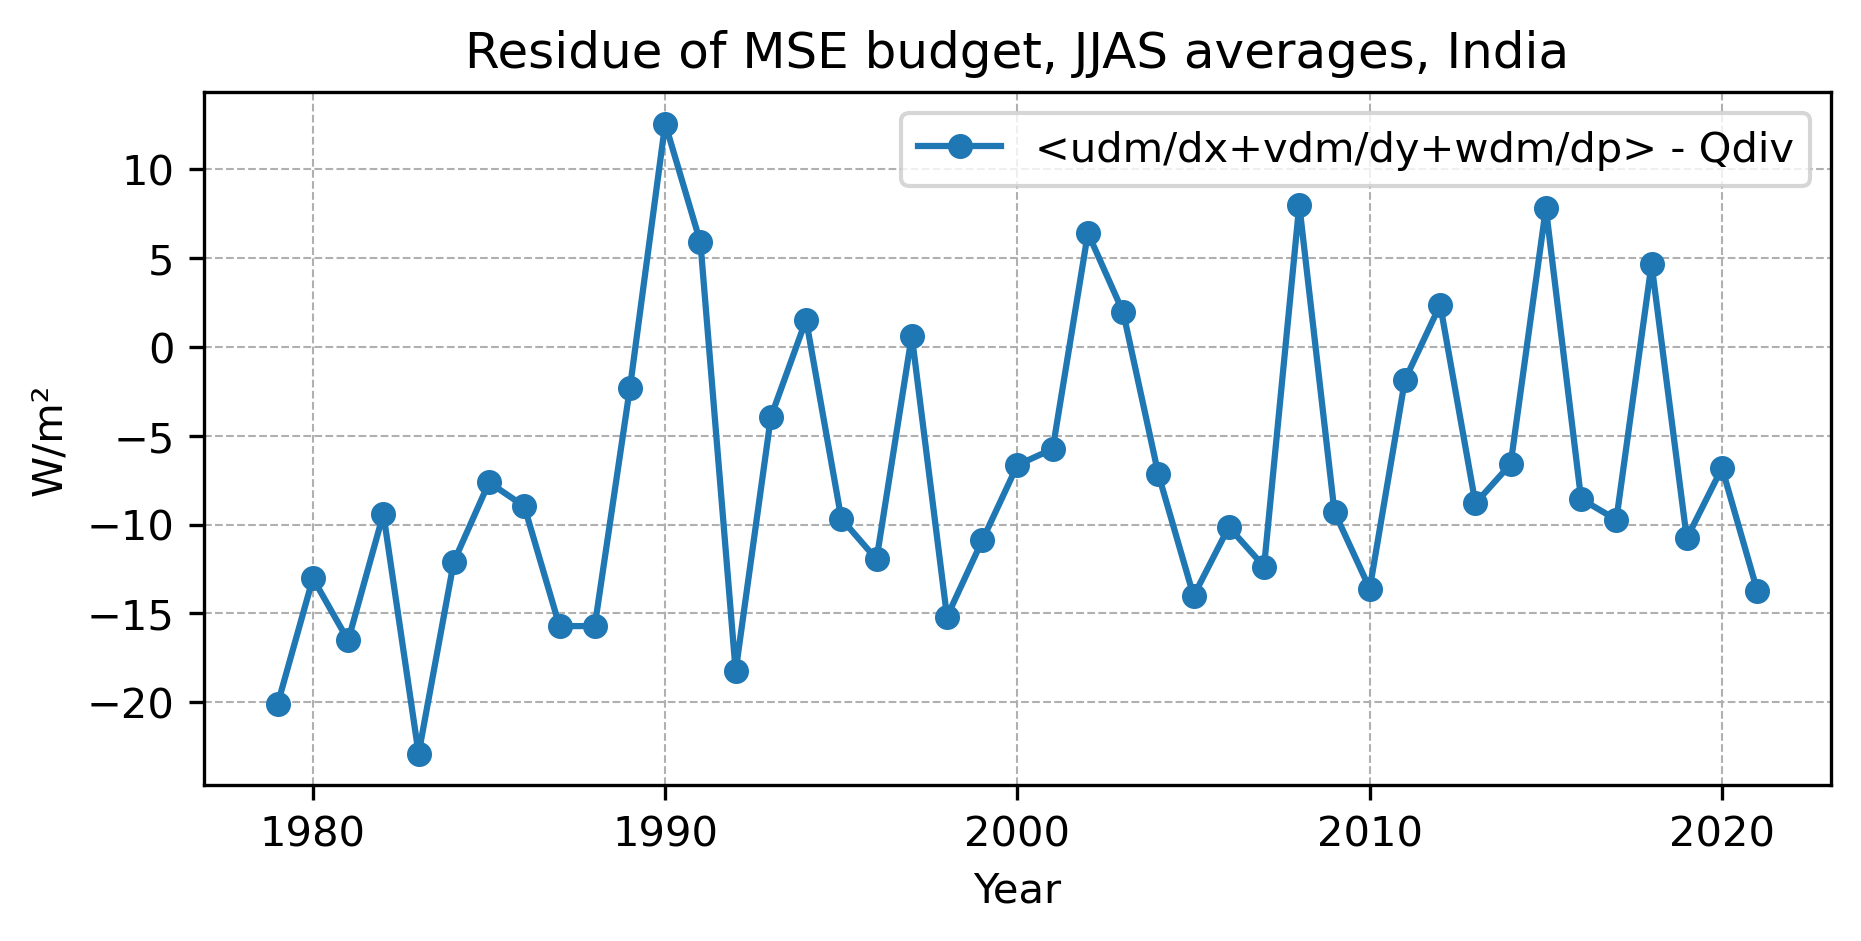

In [73]:
plt.plot(Qdiv.year, np.add(wadvind,hadvind)[20:] - acQdiv[20:], label='<udm/dx+vdm/dy+wdm/dp> - Qdiv', marker='o', markersize=5)
plt.xlabel('Year')
plt.ylabel('W/m\u00b2')
#plt.ylim(50,120)
plt.legend()
plt.title('Residue of MSE budget, JJAS averages, India')
plt.grid(linestyle='--', linewidth=0.5)